# Домашнее задание по математической статистике №2

Автор: Сушенцев Денис

## Аналитические результаты

Построим двумя способами доверительные интервалы для дисперсии нормального распределения, когда математическое ожидание известно (будем считать, что оно равно нулю).

- С помощью статистики $\frac{1}{n}\sum_{k = 1}^{n}X_k^2$ получаем интервал
\begin{align*}
    \left(\frac{1}{\lambda_{\frac{1 + \gamma}{2}}} \sum_{k = 1}^n X_k^2, \frac{1}{\lambda_{\frac{1 - \gamma}{2}}} \sum_{k = 1}^n X_k^2 \right),
\end{align*}
где $\lambda_p$ -- квантиль порядка $p$ распределения хи-квадрат с $n$ степенями свободы. 

- С помощью статистики $\left(\frac{1}{n} \sum_{k = 1}^n \right)^2$ получаем интервал
\begin{align*} 
 \left(\frac{1}{z_{\frac{3 + \gamma}{4}}^2} n\overline{X}^2, \frac{1}{z_{\frac{3 - \gamma}{4}}^2} n\overline{X}^2 \right),
\end{align*}
где $z_p$ -- квантиль порядка $p$ стандартного нормального распределения.

Попробуем сначала аналитически оценить длину интервала при увеличении объема выборки, чтобы потом сравнить аналитические результаты с численными. 

Длина первого интервала равна
\begin{align*}
    W = \left(\frac{1}{\lambda_{\frac{1 - \gamma}{2}}} - \frac{1}{\lambda_{\frac{1 + \gamma}{2}}} \right) \sum_{k = 1}^n X_k^2
\end{align*}

Длина интервала зависит от случаной величины $X_k$, поэтому будем оценивать его математическое ожидание. Так как $\mathbb{E}\left(X_k^2 \right) = \mathbb{D}\left(X_k \right) + \mathbb{E}^2\left(X_k\right) = \mathbb{D}\left(X_k \right)$, то получаем
\begin{align*}
    \mathbb{E}(W) = \left(\frac{1}{\lambda_{\frac{1 - \gamma}{2}}} - \frac{1}{\lambda_{\frac{1 + \gamma}{2}}} \right) \sum_{k = 1}^n \mathbb{E}\left(X_k^2\right) = n \left(\frac{1}{\lambda_{\frac{1 - \gamma}{2}}} - \frac{1}{\lambda_{\frac{1 + \gamma}{2}}} \right) \mathbb{D}\left(X_k \right)
\end{align*}

(Из Википедии) Аппроксимация Корниша-Фишера
\begin{align*}
    \chi _{\alpha ,n}^{2}=n+A\sqrt{n}+B+\frac{C}{\sqrt{n}}+\frac{D}{n}+\frac{E}{n\sqrt{n}} = n + o(n),
\end{align*} 
при $n \to +\infty$.

Подставим, внесем $n$ под скобки, получим следующее выражение
\begin{align*}
    \mathbb{E}(W) = \left(\frac{1}{1 + \frac{o(n)}{n}} - \frac{1}{1 + \frac{o(n)}{n}} \right) \mathbb{D}\left(X_k \right)
\end{align*}

Таким образом, при $n \to +\infty$ $\mathbb{E}(W) \to 0$. То есть длина интервала стремится к $0$.

Длина второго интервала равна
\begin{align*}
    W = n \left(\frac{1}{z_{\frac{3 - \gamma}{4}}^2}  - \frac{1}{z_{\frac{3 + \gamma}{4}}^2}  \right) \overline{X}^2
\end{align*}

Посчитаем математическое ожидание
\begin{align*}
    \mathbb{E}(W) = n \left(\frac{1}{z_{\frac{3 - \gamma}{4}}^2}  - \frac{1}{z_{\frac{3 + \gamma}{4}}^2}  \right) \mathbb{E}\left(\overline{X}^2\right) = \frac{1}{n} \left(\frac{1}{z_{\frac{3 - \gamma}{4}}^2}  - \frac{1}{z_{\frac{3 + \gamma}{4}}^2} \right) n \mathbb{D} \left(X_k \right) = \left(\frac{1}{z_{\frac{3 - \gamma}{4}}^2}  - \frac{1}{z_{\frac{3 + \gamma}{4}}^2} \right) \mathbb{D} \left(X_k \right) 
\end{align*}

Таким образом, длина интервала не зависит от размера выборки.

## Численные результаты

In [5]:
from scipy.stats import chi2
from scipy.stats import norm
from interval_length_estimation import estimate_length
import numpy as np
import matplotlib.pyplot as plt
import interval_length_estimation

Выберем параметры эксперимента. Будем генерировать выборки объема от $10$ до $1000$ с шагом в $10$; количество выборок при фиксированном объеме будет равнятся $100$; дисперсию выберем равную $1$; уровень доверия $0.8$.

In [2]:
params = {
    'N_list': np.arange(10, 1000 + 1, 10),
    'samples_count': 100,
    'variance': 1,
    'gamma': 0.8
}

Функции для оценивания границ доверительного интервала.

In [3]:
stat1 = {
    'lower': lambda sample, gamma: (sample ** 2).sum() / chi2.ppf((1 + gamma) / 2, len(sample)), 
    'upper': lambda sample, gamma: (sample ** 2).sum() / chi2.ppf((1 - gamma) / 2, len(sample))
}

stat2 = {
    'lower': lambda sample, gamma: len(sample) * np.average(sample) ** 2 / norm.ppf((3 + gamma) / 4) ** 2,
    'upper': lambda sample, gamma: len(sample) * np.average(sample) ** 2 / norm.ppf((3 - gamma) / 4) ** 2
}

Получим длины доверительных интервалов.

In [6]:
%%time
interval1 = estimate_length(**params, **stat1)
interval2 = estimate_length(**params, **stat2)

CPU times: user 8.09 s, sys: 0 ns, total: 8.09 s
Wall time: 8.09 s


Можно заметить, что длина интервала (первой статистики) стремится к 0, как мы и оценивали.

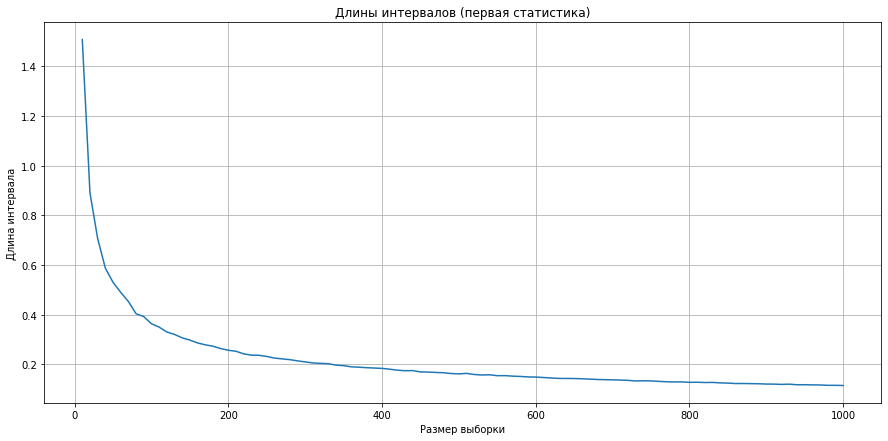

In [16]:
plt.figure(figsize=(15, 7))
plt.title('Длины интервалов (первая статистика)')
plt.xlabel('Размер выборки')
plt.ylabel('Длина интервала')
plt.grid(True)
plt.plot(params['N_list'], interval1);

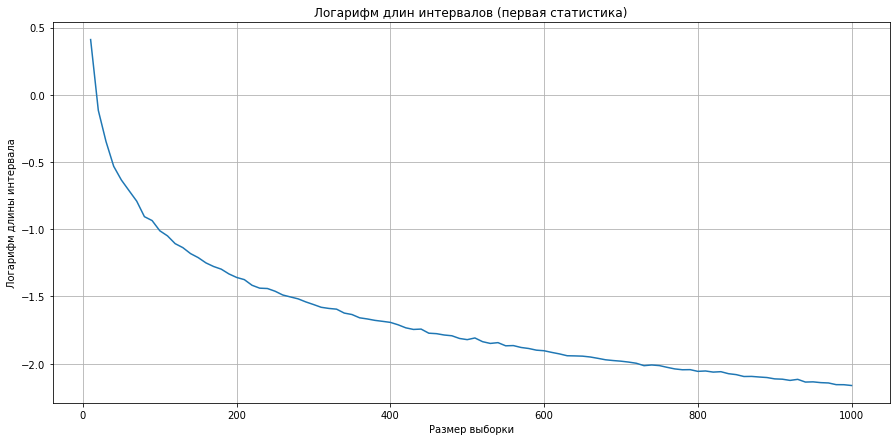

In [17]:
plt.figure(figsize=(15, 7))
plt.title('Логарифм длин интервалов (первая статистика)')
plt.xlabel('Размер выборки')
plt.ylabel('Логарифм длины интервала')
plt.grid(True)
plt.plot(params['N_list'], np.log(interval1));

Оценим длину интервала (второй статистики).

In [9]:
variance = params['variance']
gamma = params['gamma']

interval_length = (1 / norm.ppf((3 - gamma) / 4) ** 2 - 1 / norm.ppf((3 + gamma) / 4) ** 2) * variance

In [10]:
interval_length

62.95850616754843

Сравним со средним значением полученных интервалов.

In [11]:
np.average(interval2)

64.52400404075738

Заметим, что наши аналитические оценки очень близки с численными результатами.

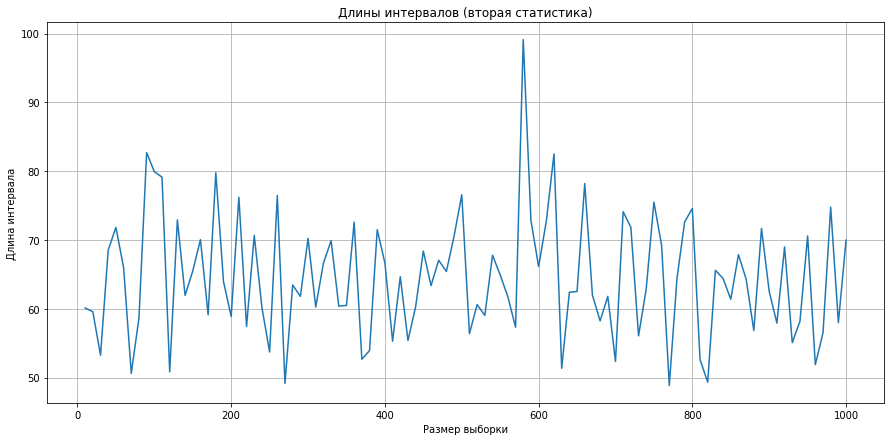

In [18]:
plt.figure(figsize=(15, 7))
plt.title('Длины интервалов (вторая статистика)')
plt.xlabel('Размер выборки')
plt.ylabel('Длина интервала')
plt.grid(True)
plt.plot(params['N_list'], interval2);